## Kernel Logistic Regression

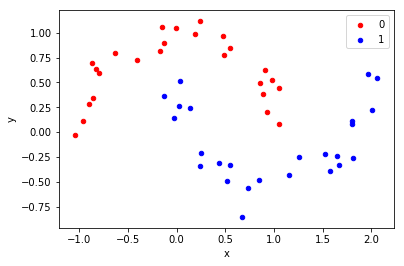

Training Started . .
Kernel: RBF
Sigma:  1.0
Using SGD with eta: 0.001  and maxIter:  1000

Training Completed.

Trained Model alpha values of first 5 training data and bias
-------------------------------------------------------------
Traing Data[ 0 ]= -0.6779179272148285
Traing Data[ 1 ]= -0.09360823883879744
Traing Data[ 2 ]= 0.25093948594296417
Traing Data[ 3 ]= -0.07943865803321784
Traing Data[ 4 ]= -0.007831127808832777

Bias = -0.0035782414377119563
-------------------------------------------------------------
Evaluating model accuracy on training data

Accuracy = 0.85

-------------------------------------------------------------
Evaluating model accuracy on test data
----------------
input=(0.7372688561528762,-0.5625051924614632)
Actual value =1.0
Calculated y =0.9612863693491737
Predicted value=1
Result = Correct
----------------
----------------
input=(1.9674245346127115,0.5822993457217819)
Actual value =1.0
Calculated y =0.5147682110944043
Predicted value=1
Result = Correct

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from math import exp
import random
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split

# generate 2d classification dataset
X, y = make_moons(n_samples=50, noise=0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

lst = pd.DataFrame(X)
lst['y'] = pd.DataFrame(y)
lst1= lst.values.tolist()


numFeatures = 2
trainData,testData = train_test_split(lst1, test_size=0.2, random_state=42)


numTrain = len(trainData)
numTest = len(testData)

# Alpha Values for each training data with Bias value which will be stored in the end
alphas = [0.0 for i in range(numTrain+1)]


#Kernel Matrix
kernelMatrix = [0.0 for i in range(numTrain)]
for i in range(len(kernelMatrix)):
    kernelMatrix[i]=[0.0 for i in range(numTrain)]
    
#RBF Kernel   
def Kernel(v1,v2,sigma):
    num = 0.0
    for i in range(len(v1)-1):
        num+=(v1[i]-v2[i]) * (v1[i]-v2[i])
    denom = 2.0 * sigma * sigma
    z = num / denom
    return(exp(-z))


sigma = 1.0 # The value chosen after trail and error 

for i in range(numTrain):
    for j in range(numTrain):
        k = Kernel(trainData[i],trainData[j],sigma)
        kernelMatrix[i][j] = kernelMatrix[j][i] = k

eta = 0.001 # Learning Rate
iter = 0
maxIter = 1000
indices =list(range(numTrain))

#Shuffle to scrambel the order of training data
def Shuffle(indices):
    for i in range(len(indices)):
        ri = random.randint(i,len(indices) - 1) 
        tmp = indices[i]
        indices[i] = indices[ri]
        indices[ri] = tmp

def Accuracy(data,trainData,alphas,sigma,verbose):
    numCorrect = 0
    numWrong = 0
    numTrain = len(trainData)
    numFeatures = len(trainData[0])-1
    for i in range(len(data)):
        sum = 0.0
        for j in range(len(alphas)-1):
            k = Kernel(data[i],trainData[j],sigma)
            sum += alphas[j] * k
        sum += alphas[len(alphas)-1] * 1
        y = 1.0/(1.0+exp(-sum))
        t = data[i][numFeatures]
        pred = 0
        if y > 0.5:
            pred = 1            
        if verbose:
            print("----------------")
            print("input=(",end="")
            for j in range(len(data[i])-2):
                print(data[i][j],end="")
                print(",",end="")
            print(data[i][len(data[i])-2],end="")
            print(")")
            print("Actual value =",end="")
            print(t)
            print("Calculated y =",end="")
            print(y)
            print("Predicted value=",end="")
            print(pred)
            if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                numCorrect+=1
                print("Result = Correct")
                print("----------------")
            else:
                numWrong+=1
                print("Result = Wrong")
                print("----------------")
            
        else:
            if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                numCorrect+=1
            else:
                numWrong+=1
    if verbose:
        print("Number of correct predictions = ",end="")
        print(numCorrect)
        print("Number of wrong predictions = ",end="")
        print(numWrong)
    return((1.0*numCorrect) / (numCorrect+numWrong))

print("Training Started . .")
print("Kernel: RBF")
print("Sigma: ",sigma)
print("Using SGD with eta:",eta," and maxIter: ",maxIter)

while iter < maxIter:
    Shuffle(indices)
    for idx in range(len(indices)):
        i = indices[idx]
        sum = 0.0
        for j in range(len(alphas)-1):
            sum += alphas[j] * kernelMatrix[i][j]
        sum += alphas[len(alphas)-1]
        y = 1.0/(1.0+exp(-sum))
        t = trainData[i][numFeatures]
        for j in range(len(alphas)-1):
            alphas[j] = alphas[j] + (eta * (t-y) * kernelMatrix[i][j])
        alphas[len(alphas)-1] = alphas[len(alphas)-1] + (eta * (t - y)) * 1
    iter += 1

print("")
print("Training Completed.")
print("")
print("Trained Model alpha values of first 5 training data and bias")
print("-------------------------------------------------------------")
for i in range(5):
    print("Traing Data[",i,"]= ",end="")
    print(alphas[i])

print("")
print("Bias = ",end="")
print(alphas[numTrain])
print("-------------------------------------------------------------")
print("Evaluating model accuracy on training data")
print("")
accTrain = Accuracy(trainData,trainData,alphas,sigma,0) #0 = false
print("Accuracy = ",end="")
print(accTrain)
print("")
print("-------------------------------------------------------------")
print("Evaluating model accuracy on test data")
accTest = Accuracy(testData,trainData,alphas,sigma,1) # 1 for true verbose
print("Accuracy = ",end="")
print(accTest)
print("-------------------------------------------------------------")




